In [1]:
import tensorflow as tf
from PIL.ImageFile import ImageFile
from tensorflow import keras
from tensorflow.python.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plot
from PIL import Image
import os
import pathlib
import time

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
train_data_dir = pathlib.Path("D:\\Projekty\\Poksy\\data\\data_combined — kopia\\train")
test_data_dir = pathlib.Path("D:\\Projekty\\Poksy\\data\\data_combined — kopia\\train")

CLASS_NAMES = np.array([item.name for item in train_data_dir.glob('*')])


BATCH_SIZE = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150
EPOCHS = 100


train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255,
                                                                        validation_split=0.2,
                                                                        horizontal_flip=True,
                                                                        rotation_range=40,
                                                                        zoom_range=0.15,
                                                                        shear_range=0.1,
                                                                        width_shift_range=0.15,
                                                                        height_shift_range=0.15)

validate_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_data_gen = train_image_generator.flow_from_directory(directory=str(train_data_dir),
                                                           shuffle=True,
                                                           color_mode='rgb',
                                                           batch_size=BATCH_SIZE,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           classes=list(CLASS_NAMES),
                                                           subset='training')

validate_data_gen = train_image_generator.flow_from_directory(directory=str(test_data_dir),
                                                              shuffle=True,
                                                              color_mode='rgb',
                                                              batch_size=BATCH_SIZE,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              classes=list(CLASS_NAMES),
                                                              subset='validation')



Found 5800 images belonging to 138 classes.
Found 1384 images belonging to 138 classes.


In [3]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(len(CLASS_NAMES), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

TRAIN_STEPS_PER_EPOCH = np.ceil(train_data_gen.samples / BATCH_SIZE)
VALIDATE_STEPS_PER_EPOCH = np.ceil(validate_data_gen.samples / BATCH_SIZE)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [4]:
start_time = time.time()

history = model.fit(
    train_data_gen,
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=validate_data_gen,
    validation_steps=VALIDATE_STEPS_PER_EPOCH
)

end_time = time.time()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)



  ...
    to  
  ['...']


C:\Users\spesz\anaconda3\envs\dlp\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


  ...
    to  
  ['...']
Train for 91.0 steps, validate for 22.0 steps
Epoch 1/100
25/91 [=======>......................] - ETA: 1:07 - loss: 4.8848 - accuracy: 0.0254

C:\Users\spesz\anaconda3\envs\dlp\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


91/91 [==============================] - 112s 1s/step - loss: 4.4088 - accuracy: 0.0584 - val_loss: 3.6421 - val_accuracy: 0.1662
Epoch 2/100
91/91 [==============================] - 113s 1s/step - loss: 3.4879 - accuracy: 0.1697 - val_loss: 3.0842 - val_accuracy: 0.2399
Epoch 3/100
91/91 [==============================] - 112s 1s/step - loss: 3.0232 - accuracy: 0.2593 - val_loss: 2.7358 - val_accuracy: 0.3475
Epoch 4/100
91/91 [==============================] - 112s 1s/step - loss: 2.7581 - accuracy: 0.2998 - val_loss: 2.5510 - val_accuracy: 0.3678
Epoch 5/100
91/91 [==============================] - 112s 1s/step - loss: 2.5471 - accuracy: 0.3478 - val_loss: 2.3183 - val_accuracy: 0.4314
Epoch 6/100
91/91 [==============================] - 112s 1s/step - loss: 2.3712 - accuracy: 0.3914 - val_loss: 2.1821 - val_accuracy: 0.4487
Epoch 7/100
91/91 [==============================] - 115s 1s/step - loss: 2.2263 - accuracy: 0.4291 - val_loss: 2.1033 - val_accuracy: 0.4624
Epoch 8/100
91/91 

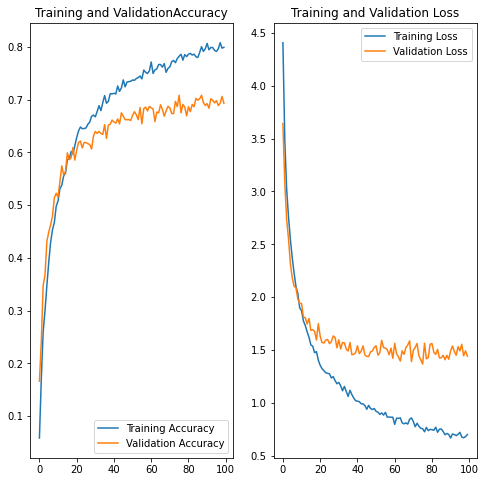

the network was trained for  191.65983521143596  minutes


In [5]:
plot.figure(figsize=(8, 8))
plot.subplot(1, 2, 1)
plot.plot(epochs_range, acc, label='Training Accuracy')
plot.plot(epochs_range, val_acc, label='Validation Accuracy')
plot.legend(loc='lower right')
plot.title('Training and ValidationAccuracy')

plot.subplot(1, 2, 2)
plot.plot(epochs_range, loss, label='Training Loss')
plot.plot(epochs_range, val_loss, label='Validation Loss')
plot.legend(loc='upper right')
plot.title('Training and Validation Loss')
plot.show()

print("the network was trained for ", (end_time - start_time) / 60, " minutes")

model.save("model_130_epoch.h5")
